In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as c
import matplotlib.pyplot as plt
from scipy.special import erf
import pandas as pd
import tikzplotlib

from axion_functions import *

In [2]:
cast_df = pd.read_table("..\\cast.txt", header=None)
cast_df.columns = ["m_a ev", "g gev"]
cast_M_df = pd.read_table("..\\cast_highm.txt", header=None)
cast_M_df.columns = ["m_a ev", "g gev"]
iaxo_df = pd.read_table("..\\iaxo_plot.txt", header=None)
iaxo_df.columns = ["m_a ev", "g gev"]

In [20]:
def g_ag(mass, en = 2):
    z=0.56
    return np.abs(0.19e-9*(mass)*(en-2*(4+z)/(3*(1+z))))

sabre_3_m = np.array([1e-4, 1e3, 5e3, 10e3])
sabre_3_g = np.array([1.23e-10, 1.23e-10, 1.44e-10, 2.899e-10])
sabre_5_g  = sabre_3_g*(3/5)**(1/4)
sabre_10_g = sabre_3_g*(3/10)**(1/4)


sabre_bg_5 = np.array([3.8049625406156194e-10, 3.8049625406156194e-10, 4.4455429491041426e-10, 8.972225840086428e-10])
sabre_bg_3 = np.array([4.0928315871993565e-10, 4.0928315871993565e-10 ,4.781875881858486e-10, 9.651030446110687e-10])
sabre_bg_10 = sabre_bg_5*(3/10)**(1/4)



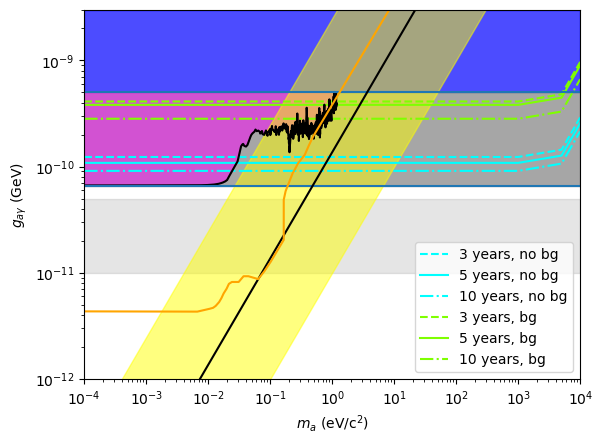

In [21]:
fig,ax = plt.subplots()
mass_axis = np.logspace(-4, 4)

ax.plot(sabre_3_m, sabre_3_g, color="cyan", label="3 years, no bg", ls="dashed")
ax.plot(sabre_3_m, sabre_5_g, color="cyan", label="5 years, no bg")
ax.plot(sabre_3_m, sabre_10_g, color="cyan",label="10 years, no bg", ls="dashdot")

ax.plot(sabre_3_m, sabre_bg_3, color="chartreuse", label="3 years, bg", ls="dashed")
ax.plot(sabre_3_m, sabre_bg_5, color="chartreuse", label="5 years, bg")
ax.plot(sabre_3_m, sabre_bg_10, color="chartreuse", label="10 years, bg", ls="dashdot")

#ax.plot(cast_M_df["m_a ev"], cast_M_df["g gev"])
ax.plot(cast_df["m_a ev"], cast_df["g gev"], color="black")

ax.hlines(5e-10, 1e-4, 1e4)
xenon = ax.fill_between((1e-4, 1e4), 5e-10, 3e-9, alpha=0.7, color="blue")
hb_cut = ax.fill_between((1e-4, 1e4), 0.66e-10, 5e-10, color="gray", alpha=0.7)
ax.hlines(0.66e-10, 1e-4, 1e4)

cast = ax.fill_between(np.array(cast_df["m_a ev"]), 
                 np.array(cast_df["g gev"]), 5e-10, color="magenta", alpha=0.5)

hb_hint = hb_cut = ax.fill_between((1e-4, 1e4), 0.1e-10, 0.5e-10, color="grey", alpha=0.2)

#ax.plot(mass_axis, g_ag(mass_axis, en=44/3), color="black")
#ax.plot(mass_axis, g_ag(mass_axis, en=2   ), color="black")
ax.plot(mass_axis, g_ag(mass_axis, en=8/3 ), color="black")
ax.fill_between(mass_axis,g_ag(mass_axis, en=44/3), g_ag(mass_axis, en=2), color="yellow", alpha=0.5)


ax.plot(iaxo_df["m_a ev"], iaxo_df["g gev"], color="orange")
plt.legend()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-12, 3e-9)
ax.set_xlim(1e-4 , 1e4)

plt.ylabel("$g_{a\gamma}$ (GeV)")
plt.xlabel("$m_a$ (eV/c$^2$)")

plt.show()